In [2]:
import torch
import torch.nn as nn

In [3]:
from transformers import AutoTokenizer

### Choosing the Model

In [4]:
model_name = "google/bert_uncased_L-2_H-128_A-2"

### Exploring the Model's Tokenizer

In [5]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
tokenizer("I")

{'input_ids': [101, 1045, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [7]:
tokenizer("I am a boy")

{'input_ids': [101, 1045, 2572, 1037, 2879, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [8]:
tokenizer("I am a criminal")

{'input_ids': [101, 1045, 2572, 1037, 4735, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [9]:
tokenizer("These are raw vectors, no contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2053, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [10]:
tokenizer("These are raw vectors, with contextual meaning")

{'input_ids': [101, 2122, 2024, 6315, 19019, 1010, 2007, 6123, 8787, 3574, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
tokenizer("with")

{'input_ids': [101, 2007, 102], 'token_type_ids': [0, 0, 0], 'attention_mask': [1, 1, 1]}

In [12]:
batch = tokenizer("These are raw vectors, without contextual meaning", padding = "max_length", truncation = True, max_length = 32, return_tensors = 'pt')

In [13]:
batch

{'input_ids': tensor([[  101,  2122,  2024,  6315, 19019,  1010,  2302,  6123,  8787,  3574,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])}

### Checking GPU Availability

In [14]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Importing AutoModel and initialising the Transformer Model

In [15]:
from transformers import AutoModel

In [16]:
mod = AutoModel.from_pretrained(model_name) ## the transformer model

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [17]:
mod = mod.to(device)

In [18]:
t = mod(**batch.to(device))

In [19]:
batch.input_ids.shape

torch.Size([1, 32])

### Storing the Embedding Dimension in a variable

In [20]:
## The pretrained model's embedding dimension
EMB_DIM = t.last_hidden_state.shape[2]

In [21]:
sentences = ["These are raw vectors, without contextual meaning", "God is real"]

In [22]:
batch = tokenizer(sentences, padding = "max_length", truncation = True, max_length = 200, return_tensors = 'pt')

In [23]:
t.last_hidden_state.shape

torch.Size([1, 32, 128])

### Downloading the Dataset

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [25]:
import kagglehub
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

In [26]:
file_path = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
df = pd.read_csv(file_path)

In [27]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Encoding Sentiment: Positive = 1, Negative = 0

In [28]:
df['encoded_senti'] = 0

In [29]:
df.loc[df['sentiment'] == 'positive', 'encoded_senti'] = 1

In [30]:
df

,review,sentiment,encoded_senti
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [31]:
df['encoded_senti'].value_counts()

,count
encoded_senti,
1,25000
0,25000


### Train-Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['encoded_senti'], shuffle = True, random_state = 100, test_size = 0.2)

### Definition for the Model Class

In [580]:
class lstm(nn.Module):
  ## The Model
  def __init__(self, inp_emb_dim):
    super().__init__()
    self.lstm_layer = nn.LSTM(inp_emb_dim, 32, dropout = 0.3, batch_first = True)
    self.lin1 = nn.Linear(32, 1)
    # self.lin2 = nn.Linear(8, 1)
    self.sig = nn.Sigmoid()
    # self.

  def forward(self, X):
    out = self.lstm_layer(X)
    # print(out[1].shape)
    # out = self.lin1(out[1][1])
    out = self.lin1(out[1][1])
    # out = self.lin2(out)
    out = self.sig(out)
    return out

In [581]:
torch.cuda.empty_cache()

In [582]:
MAX_LENGTH = 100 ## Max Number of Tokens

In [583]:
import tqdm

### Training

In [129]:
X_train_list = list(X_train)

#### Preparing the Train Tensor

In [38]:
# mod = torch.compile(mod)

list_embed = torch.empty((len(X_train_list), 100, EMB_DIM), dtype=torch.float16)  # Pre-allocate tensor

batch_size = 64
for i in tqdm.tqdm(range(0, len(X_train_list), batch_size)):
    batch = X_train_list[i:i+batch_size]
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        ## tokenize
        inputs = tokenizer(batch, padding="max_length", truncation=True,
                           max_length=MAX_LENGTH, return_tensors="pt").to(device, non_blocking=True)

        ## pass through transformer model
        out = mod(**inputs)

        ## Transfer to CPU and store in tensor
        emb = out.last_hidden_state.cpu()  # Shape: (batch_size, MAX_LENGTH, EMB_DIM)
        list_embed[i:i+batch_size] = emb

torch.cuda.empty_cache()


  0%|          | 0/625 [00:00<?, ?it/s]<ipython-input-38-3891339925>:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 625/625 [00:41<00:00, 14.99it/s]


#### X_train and y_train tensors

In [263]:
X_train_tensor = list_embed

In [264]:
y_train_tensor = torch.from_numpy(y_train.values)

#### Model Instance

In [584]:
torch.manual_seed(10)
model = lstm(EMB_DIM).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


#### Optimizer, Num Epochs, Learning Rate

In [589]:
epochs = 20
learning_rate = 0.001

In [586]:
from torch.optim import Adam

In [587]:
optimizer = Adam(model.parameters(), lr = learning_rate)
loss_func = nn.BCELoss()

#### Dataset Object

In [588]:
from torch.utils.data import Dataset, DataLoader

In [590]:
class CustomDataset(Dataset):
  def __init__(self, X, y):
    ## Expects the input X to be transformer embedded already
    super().__init__()
    self.X = X
    self.y = y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [591]:
dataset = CustomDataset(X_train_tensor, y_train_tensor)

#### Dataloader Object

In [592]:
batch_size = 32

In [593]:
dl = DataLoader(dataset, batch_size = batch_size, shuffle = True)

In [594]:
num_batches = 40000/batch_size

#### Testing forward pass for shape compatibility

In [595]:
x = model(dataset[:10][0].to(torch.float32).to(device)).reshape(-1).to('cpu')

In [596]:
loss_func(x, dataset[:10][1].to(torch.float32))

tensor(0.7520, grad_fn=<BinaryCrossEntropyBackward0>)

#### Training Loop

In [597]:
model.train()

lstm(
  (lstm_layer): LSTM(128, 32, batch_first=True, dropout=0.3)
  (lin1): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [598]:
for epoch in range(epochs):
  epoch_loss = 0
  for inp, outp in tqdm.tqdm(dl):

    ## Storing on cuda
    inp = inp.to(device)
    outp = outp.to(device)

    optimizer.zero_grad()

    ## Forward Passs
    pred = model(inp.to(torch.float32))

    ## Loss Calculation
    loss = loss_func(pred.reshape(-1).to(torch.float32), outp.to(torch.float32))
    epoch_loss += loss.item()

    ## Gradient Calculation and Parameter Updation
    loss.backward()
    optimizer.step()
  print(f'Epoch: {epoch + 1}, Loss = {epoch_loss/num_batches}')

100%|██████████| 1250/1250 [00:03<00:00, 318.24it/s]


Epoch: 1, Loss = 0.5905771013259887


100%|██████████| 1250/1250 [00:03<00:00, 323.11it/s]


Epoch: 2, Loss = 0.5368310462474823


100%|██████████| 1250/1250 [00:04<00:00, 298.77it/s]


Epoch: 3, Loss = 0.5018604151248932


100%|██████████| 1250/1250 [00:03<00:00, 316.00it/s]


Epoch: 4, Loss = 0.47518265632390977


100%|██████████| 1250/1250 [00:03<00:00, 333.04it/s]


Epoch: 5, Loss = 0.4510965912818909


100%|██████████| 1250/1250 [00:04<00:00, 293.62it/s]


Epoch: 6, Loss = 0.4330840037107468


100%|██████████| 1250/1250 [00:04<00:00, 302.19it/s]


Epoch: 7, Loss = 0.41533078018426894


100%|██████████| 1250/1250 [00:03<00:00, 325.80it/s]


Epoch: 8, Loss = 0.40026741602420807


100%|██████████| 1250/1250 [00:04<00:00, 297.59it/s]


Epoch: 9, Loss = 0.3850497265577316


100%|██████████| 1250/1250 [00:04<00:00, 304.94it/s]


Epoch: 10, Loss = 0.3701706188976765


100%|██████████| 1250/1250 [00:03<00:00, 325.73it/s]


Epoch: 11, Loss = 0.35623426744937897


100%|██████████| 1250/1250 [00:04<00:00, 304.13it/s]


Epoch: 12, Loss = 0.34592589129209517


100%|██████████| 1250/1250 [00:04<00:00, 308.21it/s]


Epoch: 13, Loss = 0.3312301243543625


100%|██████████| 1250/1250 [00:03<00:00, 313.17it/s]


Epoch: 14, Loss = 0.3213701268196106


100%|██████████| 1250/1250 [00:04<00:00, 298.09it/s]


Epoch: 15, Loss = 0.3091311023533344


100%|██████████| 1250/1250 [00:04<00:00, 309.41it/s]


Epoch: 16, Loss = 0.3000607258617878


100%|██████████| 1250/1250 [00:03<00:00, 330.32it/s]


Epoch: 17, Loss = 0.28742220219373704


100%|██████████| 1250/1250 [00:04<00:00, 307.08it/s]


Epoch: 18, Loss = 0.27587416890859606


100%|██████████| 1250/1250 [00:04<00:00, 307.93it/s]


Epoch: 19, Loss = 0.26682245030403134


100%|██████████| 1250/1250 [00:03<00:00, 324.94it/s]

Epoch: 20, Loss = 0.2569859777390957


In [599]:
X_train_tensor[0]

tensor([[-7.5391e-01, -5.2686e-01, -4.3711e+00,  ..., -4.1577e-01,
         -1.4014e+00,  1.6357e+00],
        [-1.3779e+00,  2.9932e-01,  4.1162e-01,  ..., -2.2305e+00,
         -1.3877e+00,  1.0488e+00],
        [-2.3945e+00, -1.7261e-01, -9.6143e-01,  ..., -1.6611e+00,
         -2.0098e+00,  1.9492e+00],
        ...,
        [-1.8787e-01,  6.8652e-01,  2.6172e-01,  ..., -1.7803e+00,
         -8.1543e-01,  4.8486e-01],
        [-7.5586e-01,  7.7539e-01,  4.6875e-01,  ...,  2.4986e-03,
         -2.4512e+00,  1.7236e-01],
        [-4.0308e-01, -5.3635e-03,  3.2471e-01,  ..., -3.3545e-01,
         -1.6250e+00, -1.0283e+00]], dtype=torch.float16)

In [600]:
model(X_train_tensor[1].to(torch.float32).to(device))

tensor([[0.0228]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [601]:
X_train[1], y_train[1]

('A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well 

### Measuring Train Accuracy

In [602]:
total_corr = 0
preds = []
actual = []

In [603]:
with torch.no_grad():
   for inp, outp in tqdm.tqdm(dl):
    inp = inp.to(device)
    actual.append(outp)
    outp = outp.to(device)
    pred = model(inp.to(torch.float32))
    preds.append(pred.to('cpu'))
    pred = pred > 0.5
    corr = torch.sum(pred.reshape(-1).to(torch.float32) == outp.to(torch.float32))
    total_corr += corr

100%|██████████| 1250/1250 [00:01<00:00, 659.07it/s]


#### Printing Train Accuracy

In [604]:
total_corr/40000

tensor(0.9051, device='cuda:0')

In [605]:
preds = torch.stack(preds)
actual = torch.stack(actual)

In [606]:
actual = actual.reshape(-1)

In [607]:
actual.shape

torch.Size([40000])

In [608]:
preds = preds.reshape(-1)

In [609]:
preds.shape

torch.Size([40000])

In [610]:
y_pred = preds > 0.5
y_true = actual.numpy()

              precision    recall  f1-score   support

           0     0.9094    0.9007    0.9050     20082
           1     0.9008    0.9095    0.9051     19918

    accuracy                         0.9051     40000
   macro avg     0.9051    0.9051    0.9051     40000
weighted avg     0.9051    0.9051    0.9051     40000



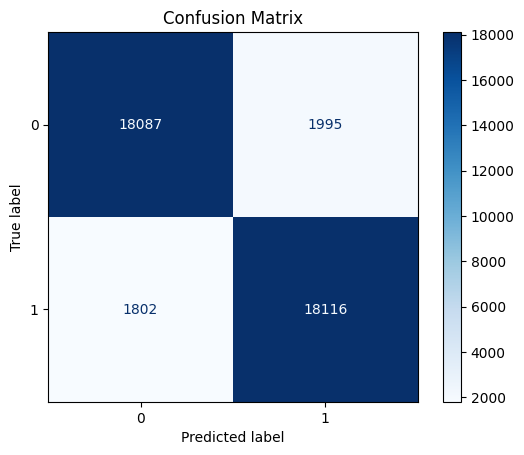

In [611]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt


cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


### Measuring Test Accuracy

In [612]:
X_test_list = list(X_test)

#### Preparing X_test tensor

In [613]:
# mod = torch.compile(mod)  # Optional; ensure compatibility

list_embed_test = torch.empty((len(X_test_list), MAX_LENGTH, EMB_DIM), dtype=torch.float16)  # Pre-allocate tensor

batch_size = 16
for i in tqdm.tqdm(range(0, len(X_test_list), batch_size)):
    batch = X_test_list[i:i+batch_size]
    with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        inputs = tokenizer(batch, padding="max_length", truncation=True,
                           max_length=100, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()  # Shape: (batch_size, 100, 128)
        list_embed_test[i:i+batch_size] = emb

torch.cuda.empty_cache()


  0%|          | 0/625 [00:00<?, ?it/s]<ipython-input-613-1654075526>:8: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
100%|██████████| 625/625 [00:12<00:00, 51.19it/s]


In [614]:
X_test_tensor = list_embed_test

In [615]:
y_test_tensor = torch.from_numpy(y_test.values)

In [616]:
test_ds = CustomDataset(X_test_tensor, y_test_tensor)

In [617]:
test_dl = DataLoader(test_ds, batch_size = 16, shuffle = False)

In [618]:
model.eval()

lstm(
  (lstm_layer): LSTM(128, 32, batch_first=True, dropout=0.3)
  (lin1): Linear(in_features=32, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [619]:
total_corr = 0
preds = []
actual = []

#### Test Loop

In [620]:
with torch.no_grad():
   for inp, outp in tqdm.tqdm(test_dl):
    inp = inp.to(device)
    actual.append(outp)
    outp = outp.to(device)
    pred = model(inp.to(torch.float32))
    preds.append(pred.to('cpu'))
    pred = pred > 0.5
    corr = torch.sum(pred.reshape(-1).to(torch.float32) == outp.to(torch.float32))
    total_corr += corr

100%|██████████| 625/625 [00:00<00:00, 862.55it/s]


In [621]:
preds = torch.stack(preds)
actual = torch.stack(actual)
actual = actual.reshape(-1)
preds = preds.reshape(-1)

In [622]:
y_pred = preds > 0.5
y_true = actual.numpy()

              precision    recall  f1-score   support

           0     0.7740    0.7682    0.7711      4918
           1     0.7773    0.7830    0.7801      5082

    accuracy                         0.7757     10000
   macro avg     0.7757    0.7756    0.7756     10000
weighted avg     0.7757    0.7757    0.7757     10000



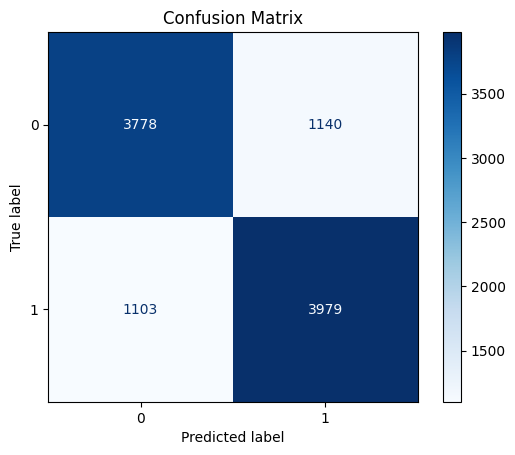

In [623]:
cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, digits=4))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [624]:
total_corr/10000 ## Accuracy

tensor(0.7757, device='cuda:0')

In [640]:
sent = X_test.iloc[30]

In [645]:
sent, y_test.iloc[30]

('Countenance! Antoine Monot, in a copycat impersonation of Kevin Smith\'s Silent Bob, keeps asking for it, but writer/director Christian Zübert never listens. Zübert just can\'t say no to a joke, no matter how cheap. The best thing about this movie is its soundtrack. Of course, Joey Burns of Calexico and the divine Jonathan Richman, understated old-school bard of "There\'s something about Mary" fame, would grace any small-town dropout story. In visual allure, Stefan (Lukas Gregorowicz) looks cool enough riding his tan six-series BMW two-door, wearing aviator shades, going nowhere. True, he *accidentally* sleeps with his wild-eyed bohemian kid sister (Marie Zielcke), but then, who wouldn\'t? Thumbs up also to how he goes black-and-white on a liberal dose of that mysterious substance they call zero-zero, but if you\'re looking for a slightly more serious rendering of what intoxication can do to you, I suggest you check out "Fear and Loathing in Las Vegas".',
 np.int64(0))

In [642]:
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        inputs = tokenizer(sent, padding="max_length", truncation=True,
                           max_length=100, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()

<ipython-input-642-1044575271>:1: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [646]:
with torch.no_grad():
  #  for inp, outp in tqdm.tqdm(test_dl):
    inp = emb.to(device)
    pred = model(inp.to(torch.float32))
    pred = pred > 0.5
    pred = pred.to('cpu')
    if pred:
      print('Positive')
    else:
      print('Negative')

Negative


In [650]:
sent = X_test.iloc[125]
print(sent)
print(y_test.iloc[125])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

I was forced to watch this film for my World Reigonal Geography class. This film is what is wrong with America today, instead of figuring out the best way out of hard times or situations we would rather complain about how it is someone else's fault. This film goes through the downfall of Flint, Michigan and blames it 100% on General Motors. In the process of doing so Moore goes to great lengths to make the executives of General Motors out to be villains just because they are doing their job in a capitalist society. Moore films several evictions throughout the film and does not ever even ask once if the person is being evicted because of a GM layoff. Additionally, he never interviews the landlords of the tenants filmed. Moore goes to great lengths to twist historical events to fit his political agenda in this film of pure propaganda.
0
Positive


<ipython-input-650-3299261569>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [651]:
sent = X_test.iloc[38]
print(sent)
print(y_test.iloc[38])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

I saw this film at Telluride Film Festival in 1997, where one of the screenwriters, José Giovanni, was being honored. It ranks highly as a great noir-crime-drama, incredible performances by Belmondo and Lino Ventura. The attention given to every character, and complex psychological portrayals, detailing loyalty, treachery, love, and hope, are tremendous. It is an excellent drama, an excellent thriller, and an excellent film. Up there with the best of Melville. (The title in English 'Class all risk,' in French 'Classe tous risques' is word-play on 'Classe Touriste,' meaning 'Tourist Class'.
1
Positive


<ipython-input-651-1897418671>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [652]:
sent = X_test.iloc[800]
print(sent)
print(y_test.iloc[800])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

This movie should not be compared to "The Sting", or other caper/heist/con game films. What makes it such a great movie experience is what it has to say about relationships, deceit and trust. It's also a fairly cutting critique of psychiatry, given that the female protagonist is a shrink who is so easily deceived and then acts out in such a primitive manner in the finale. Has Mr Mamet had an unfortunate experience in therapy? Highly, hugely recommended!
1
Positive


<ipython-input-652-3375434773>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [653]:
sent = X_test.iloc[786]
print(sent)
print(y_test.iloc[786])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

This is a great "small" film. I say "small" because it doesn't have a hundred guns firing or a dozen explosions, as in a John Woo film. Great performances by Roy Scheider and the three "bad guys". John Frankenheimer seems to have more luck with small productions these days. The film is very easy to watch, the story is more of a yarn than a washing machine--instead of everything going around and around, it seems as though things just get worse as the plot thickens. Wonderful ending, very positive. I never read the Elmore Leonard book, but it can't be much different from the film because it FEELS like I'm watching an Elmore Leonard movie.
1
Positive


<ipython-input-653-2351028272>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [654]:
sent = X_test.iloc[0]
print(sent)
print(y_test.iloc[0])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

This is a documentary about homeless women. It was interesting in the sense that this focused on women who are engaged socially - having jobs and lasting friendships - but are in situations where they can not afford housing.<br /><br />I found some of the women covered to be interesting, but there was little focus or progression in the story. The direction and editing failed to maintain my attention. There were differences in the stories of these women, of course, but the message was essentially the same and could have been told by focusing on any one of them in more depth.<br /><br />I made it to the end of the movie, but it was a rather boring journey.
0
Negative


<ipython-input-654-2394880774>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [655]:
sent = X_test.iloc[9999]
print(sent)
print(y_test.iloc[9999])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

Nagra comes from conservative Indian family that isn't exactly into girls playing competitive soccer. But our attractive young star CAN play some serious soccer. Rhys-Meyers coaches Nagra and encourages her to perform, while Knightley is supportive teammate and friend. When sis' wedding is scheduled for the same day as the ultimate soccer match, what's a girl to do? Similar in its own unique way to BFGW as Nagra tries to push the envelope on traditional family ways. Here it's dad (well-played by Kher) who can see both sides of the issue. Docked an entire point for a hokey late sexual preference non-crisis, if they needed filler they could have gone elsewhere. Nice final wrap up to the whole deal.
1
Positive


<ipython-input-655-1040991465>:4: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [ ]:
sent = X_test.iloc[125]
print(sent)
print(y_test.iloc[125])
with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
      inputs = tokenizer(sent, padding="max_length", truncation=True,
                          max_length=100, return_tensors="pt").to(device, non_blocking=True)
      out = mod(**inputs)
      emb = out.last_hidden_state.cpu()
      inp = emb.to(device)
      pred = model(inp.to(torch.float32))
      pred = pred > 0.5
      pred = pred.to('cpu')
      if pred:
        print('Positive')
      else:
        print('Negative')

In [1]:
def test_sent(sent_string):
  sent = sent_string
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
        inputs = tokenizer(sent, padding="max_length", truncation=True,
                            max_length=100, return_tensors="pt").to(device, non_blocking=True)
        out = mod(**inputs)
        emb = out.last_hidden_state.cpu()
        inp = emb.to(device)
        pred = model(inp.to(torch.float32))
        pred_val = pred > 0.5
        pred = pred.to('cpu')
        if pred_val:
          print('Positive', f"{pred.item() * 100:.2f}")
        else:
          print('Negative', f"{(1 - pred.item()) * 100:.2f}")

In [669]:
test_sent("The movie lacked quality")

Negative 99.95453357696533


<ipython-input-667-2085417861>:3: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):


In [670]:
MI_review = """Mission: Impossible –The final Reckoning: A Masterclass in Action Storytelling
Mission: Impossible The final Reckoning 2025 delivers everything you'd hope for—and more.
The soundtrack is powerful and perfectly synced with the film’s pacing, driving the energy of every sequence. The dialogues and monologues are sharp, purposeful, and filled with emotional and thematic weight."""
test_sent(MI_review)

Positive 99.951171875


<ipython-input-667-2085417861>:3: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.no_grad(), torch.cuda.amp.autocast(dtype=torch.float16):
